# Import Libraries

In [1]:
# Path manipulation for different OS
from os import path

# Data manipulation and analysis
import pandas as pd

# One-Hot encoding for categorical features and standardize numerical features
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Dataset

In [2]:
df = pd.read_csv(path.join("..", "data", "heart_disease.csv"))

# Variable Information

Only 14 attributes used:

      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)


Attribute documentation:

      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
      12 chol: serum cholestoral in mg/dl
      16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
      19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
      32 thalach: maximum heart rate achieved
      38 exang: exercise induced angina (1 = yes; 0 = no)
      40 oldpeak = ST depression induced by exercise relative to rest
      41 slope: the slope of the peak exercise ST segment
          -- Value 1: upsloping
          -- Value 2: flat
          -- Value 3: downsloping
      44 ca: number of major vessels (0-3) colored by flourosopy
      51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
      58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

For more details, refer to https://archive.ics.uci.edu/dataset/45/heart+disease

# Handle Missing Values

In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

As the rows that have missing values are few, removing them will not significantly affect training or evaluating the models.

In [4]:
df.dropna(inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Check for Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

no duplicates to remove

# Data Encoding (One-Hot Encoding)

Perform one-hot encoding for categorical variables

In [6]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohe_transform = ohe.fit_transform(df[cat_cols])
ohe_transform.head()

,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
rename_dict = {
    'sex_0': 'sex_female',
    'sex_1': 'sex_male',
    'cp_1': 'cp_typical_angina',
    'cp_2': 'cp_atypical_angina',
    'cp_3': 'cp_non_anginal_pain',
    'cp_4': 'cp_asymptomatic',
    'fbs_0': 'fbs_<120mg/dl',
    'fbs_1': 'fbs_≥120mg/dl',
    'restecg_0': 'restecg_normal',
    'restecg_1': 'restecg_ST_T_wave_abnormality',
    'restecg_2': 'restecg_left_ventricular_hypertrophy',
    'exang_0': 'exang_no',
    'exang_1': 'exang_yes',
    'slope_1': 'slope_upsloping',
    'slope_2': 'slope_flat',
    'slope_3': 'slope_downsloping',
    'ca_0.0': 'ca_0',
    'ca_1.0': 'ca_1',
    'ca_2.0': 'ca_2',
    'ca_3.0': 'ca_3',
    'thal_3.0': 'thal_normal',
    'thal_6.0': 'thal_fixed_defect',
    'thal_7.0': 'thal_reversible_defect'
}
ohe_transform.rename(columns=rename_dict, inplace=True)
ohe_transform.head()

,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,fbs_<120mg/dl,fbs_≥120mg/dl,restecg_normal,restecg_ST_T_wave_abnormality,...,slope_upsloping,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
all_encoded_cols = ohe_transform.columns.to_list()

# Replace categorical columns with one-hot encoded columns
for col in cat_cols:
  col_idx = df.columns.get_loc(col)
  df.drop(col, axis=1, inplace=True)
  encoded_cols = [c for c in ohe_transform.columns if c.startswith(col)]
  # Loop through the reversed encoded columns because each insert pushes the previously inserted columns to the right.
  for enc_col in reversed(encoded_cols):
    df.insert(col_idx, enc_col, ohe_transform[enc_col])

df.head()

,age,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,trestbps,chol,fbs_<120mg/dl,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
0,63,0.0,1.0,1.0,0.0,0.0,0.0,145,233,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,67,0.0,1.0,0.0,0.0,0.0,1.0,160,286,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,67,0.0,1.0,0.0,0.0,0.0,1.0,120,229,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,37,0.0,1.0,0.0,0.0,1.0,0.0,130,250,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [9]:
# Save on-hot encoded dataframe
df.to_csv(path.join("..", "data", "heart_disease_ohe.csv"), index=False)

# Standardize Numerical Features

In [10]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,trestbps,chol,fbs_<120mg/dl,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
0,0.936181,0.0,1.0,1.0,0.0,0.0,0.0,0.750380,-0.276443,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.378929,0.0,1.0,0.0,0.0,0.0,1.0,1.596266,0.744555,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,1.378929,0.0,1.0,0.0,0.0,0.0,1.0,-0.659431,-0.353500,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.941680,0.0,1.0,0.0,0.0,1.0,0.0,-0.095506,0.051047,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.498933,1.0,0.0,0.0,1.0,0.0,0.0,-0.095506,-0.835103,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [11]:
# save the processed dataframe
df.to_csv(path.join("..", "data", "heart_disease_preprocessed.csv"), index=False)

#  Exploratory Data Analysis (EDA)

## Basic Info

In [12]:
df.shape

(297, 29)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   297 non-null    float64
 1   sex_female                            297 non-null    float64
 2   sex_male                              297 non-null    float64
 3   cp_typical_angina                     297 non-null    float64
 4   cp_atypical_angina                    297 non-null    float64
 5   cp_non_anginal_pain                   297 non-null    float64
 6   cp_asymptomatic                       297 non-null    float64
 7   trestbps                              297 non-null    float64
 8   chol                                  297 non-null    float64
 9   fbs_<120mg/dl                         297 non-null    float64
 10  fbs_≥120mg/dl                         297 non-null    float64
 11  restecg_normal          

In [14]:
df.describe()

,age,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,trestbps,chol,fbs_<120mg/dl,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
count,2.970000e+02,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,2.970000e+02,2.970000e+02,297.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,-1.226105e-16,0.323232,0.676768,0.077441,0.164983,0.279461,0.478114,4.904420e-16,-1.958777e-16,0.855219,...,0.461279,0.070707,0.585859,0.218855,0.127946,0.067340,0.552189,0.060606,0.387205,0.946128
std,1.001688e+00,0.468500,0.468500,0.267741,0.371792,0.449492,0.500364,1.001688e+00,1.001688e+00,0.352474,...,0.499340,0.256768,0.493404,0.414168,0.334594,0.251033,0.498108,0.239009,0.487933,1.234551
min,-2.827176e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.125634e+00,-2.337704e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.241238e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.594306e-01,-7.002541e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.613719e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.550637e-02,-8.380217e-02,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.148067e-01,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.684179e-01,5.519138e-01,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,2.485798e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.851964e+00,6.099981e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


## Distribution of Numerical Features

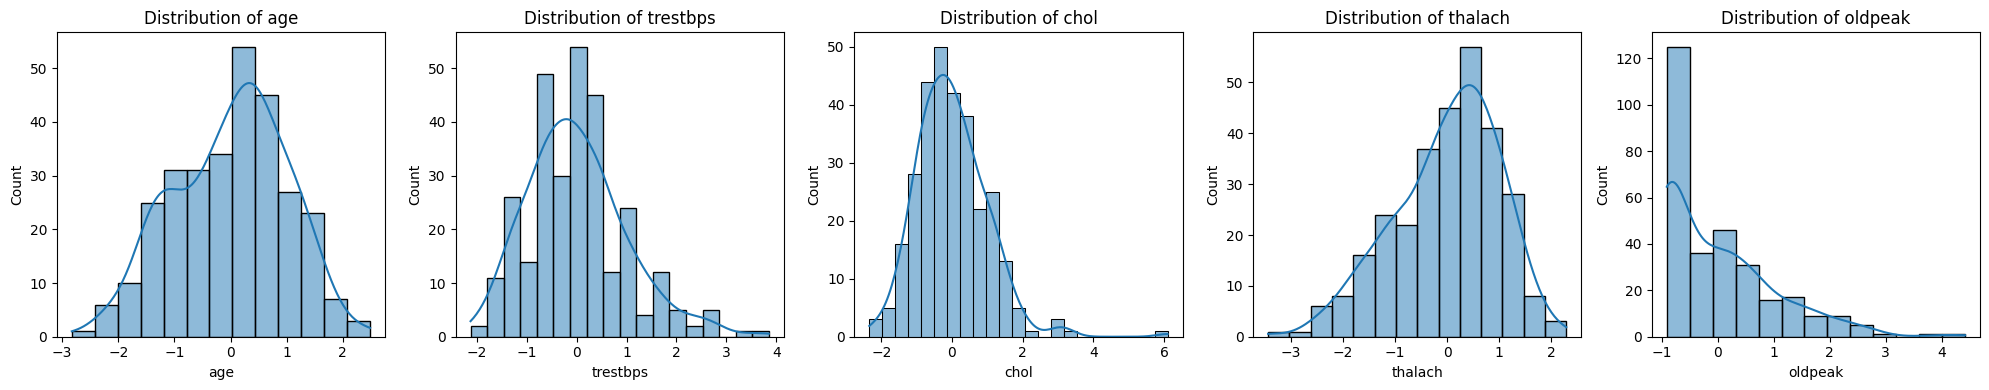

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, col in enumerate(num_cols):
  sns.histplot(data=df, x=col, ax=ax[i], kde=True)
  ax[i].set_title(f"Distribution of {col}")

plt.tight_layout()

Age: Approximately normal, slight negative skew, moderate spread, few outliers at both ends.

Trestbps (Resting Blood Pressure): Slight right skew, spread is moderate, few high-value outliers.

Chol (Cholesterol): Positively skewed (right tail), wide spread, multiple high-value outliers.

Thalach (Max Heart Rate Achieved): Roughly normal, slight left skew, moderate spread, fewer extreme outliers.

Oldpeak (ST Depression): Strongly right skewed, small values dominate, wide spread with several extreme outliers.

## Relationship Between Numerical Features and Target (num)

In [16]:
px.box(df, x='num', y=num_cols, points='all', color='num', title='Relationship Between Numerical Features and Target (num)', width=900, height=600)

Across num values (0 to 4), the medians of features stay close to each other.

Variability (IQR and whisker lengths) is similar across categories, though categories 2 to 4 show slightly higher spread.

Outliers exist in every category, especially for num = 0 and num = 3.

No single numerical feature clearly separates one num group from another.

However, higher num categories show slightly larger spread and more frequent outliers, suggesting variability in patient measurements increases with disease severity.

## Correlation Analysis

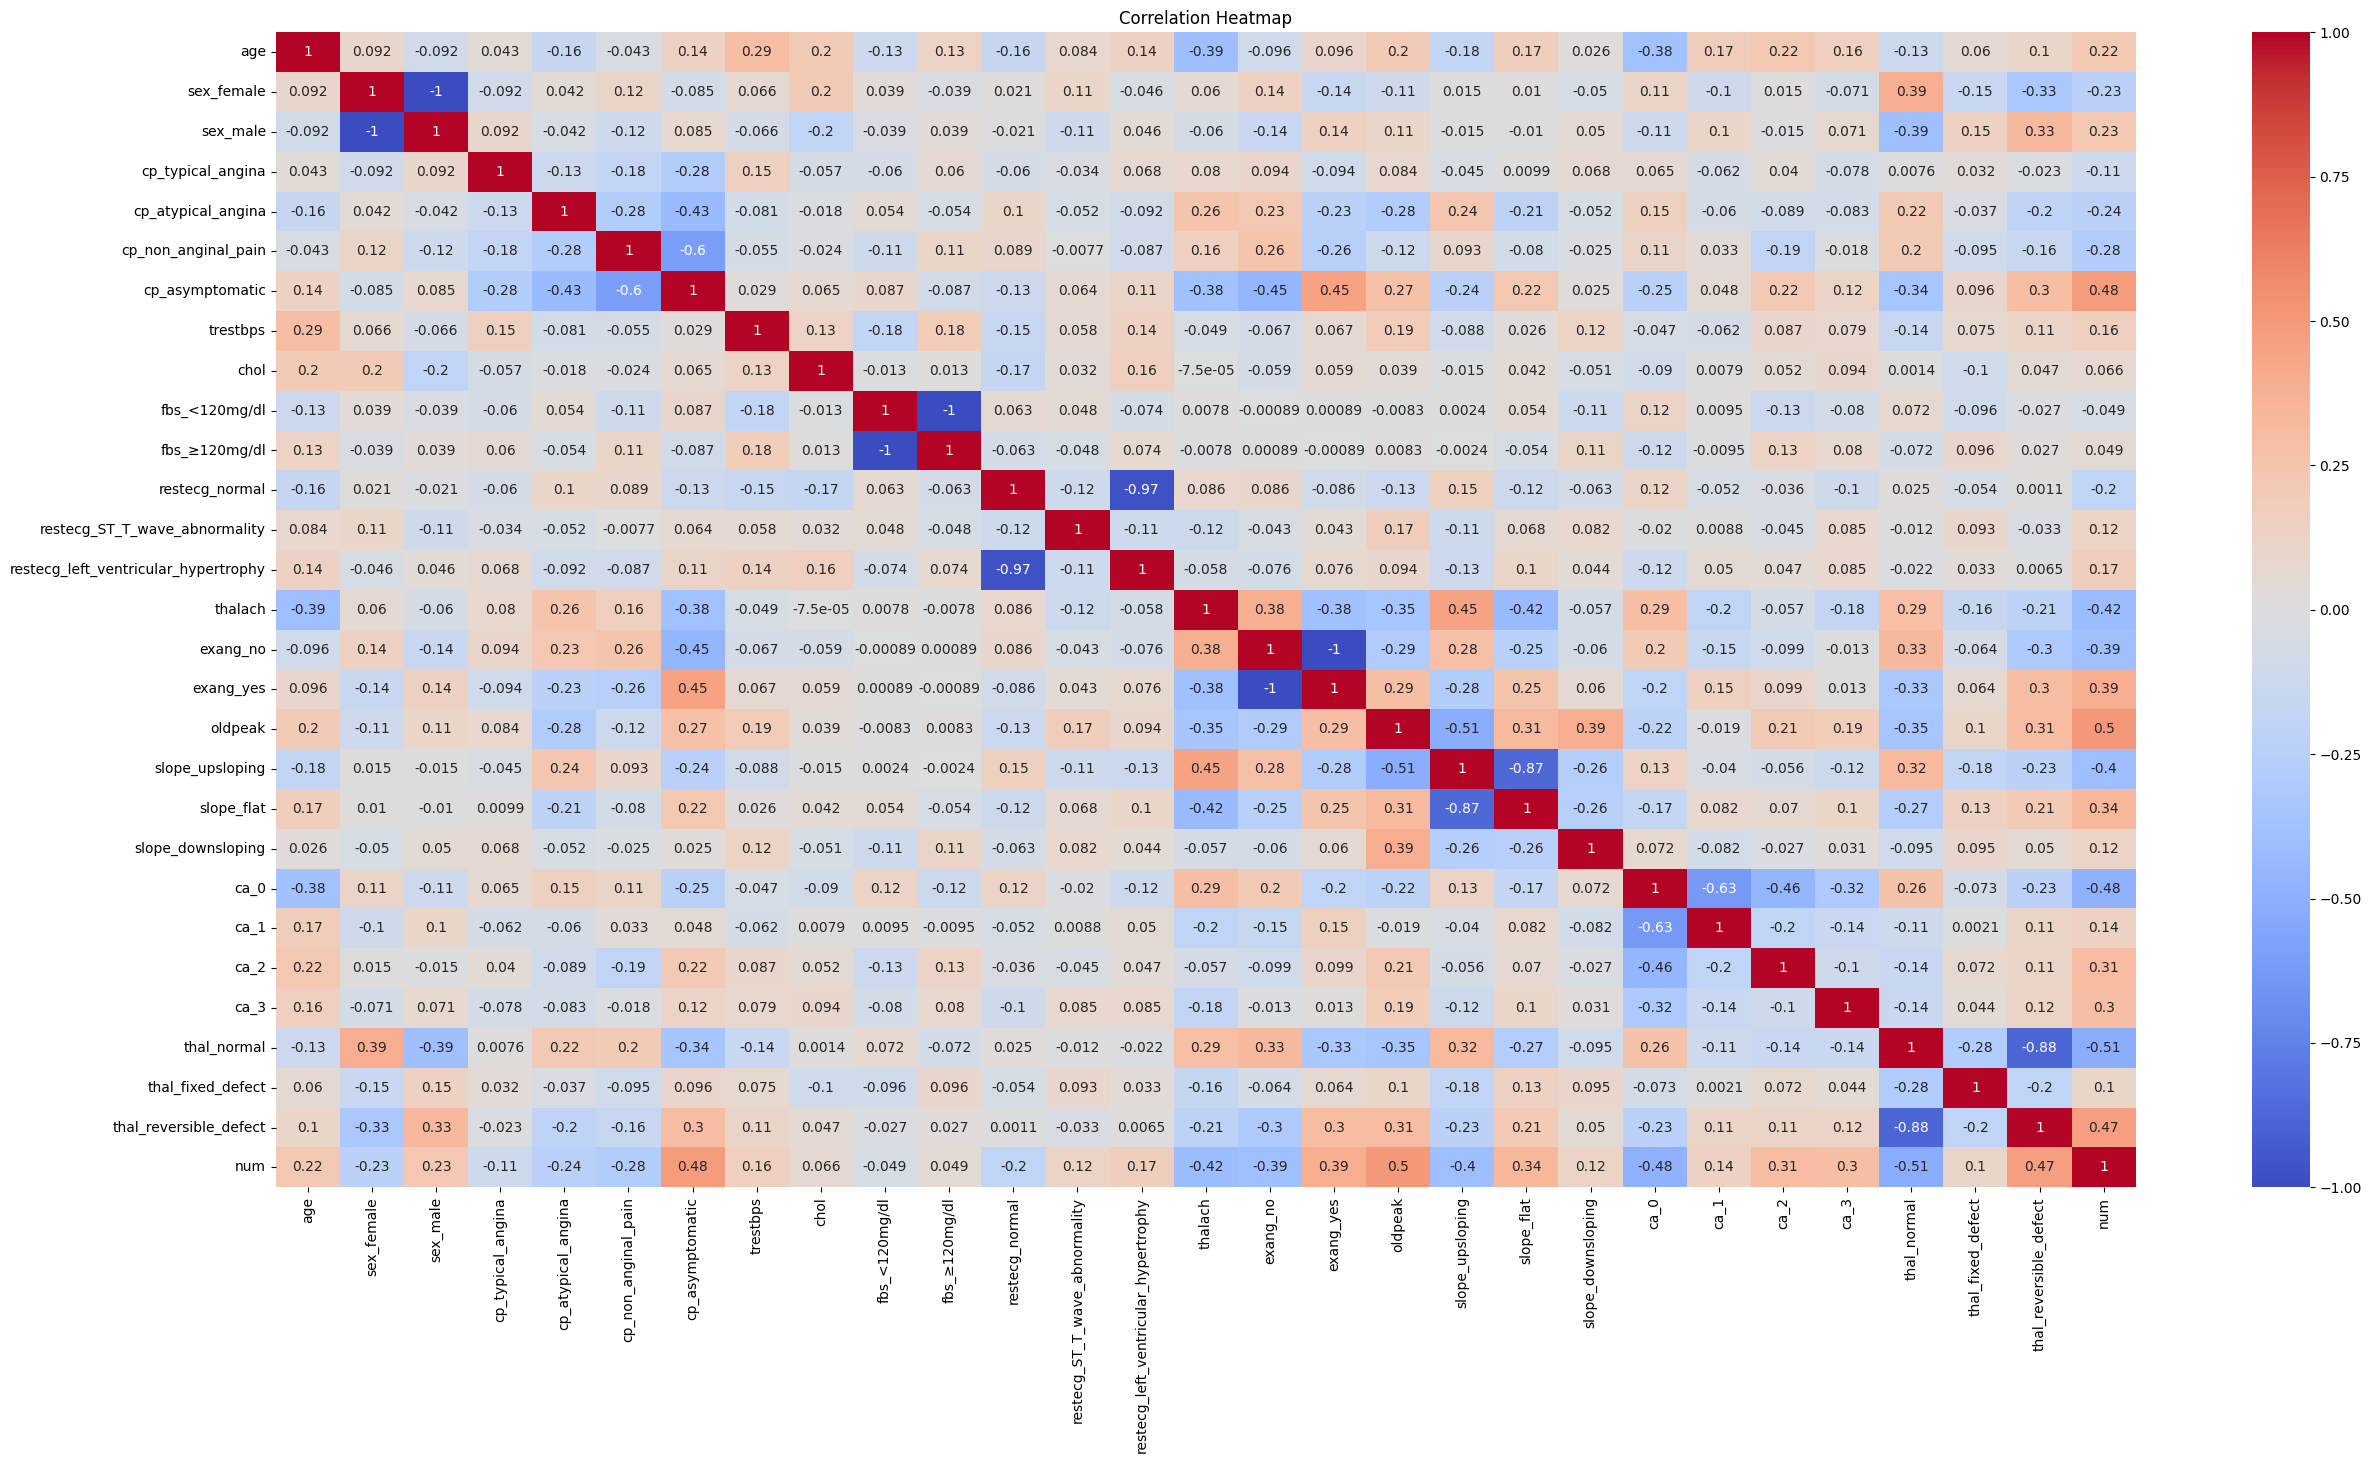

In [17]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Asymptomatic chest pain type (cp_asymptomatic) and reversible defects in the thallium stress test (thal_reversible_defect) show a positive correlation with the target (num), indicating that patients with these conditions are more likely to have heart disease.

Normal in thallium stress test (thal_normal) and number of major vessels (ca_0) show a negative correlation with the target (num), indicating that patients with these conditions are less likely to have heart disease.

Males are more likely to have heart disease than females.

Older pepole are more likly to have heart disease than young pepole.

## Distribution of Categorical Features and Target (num)

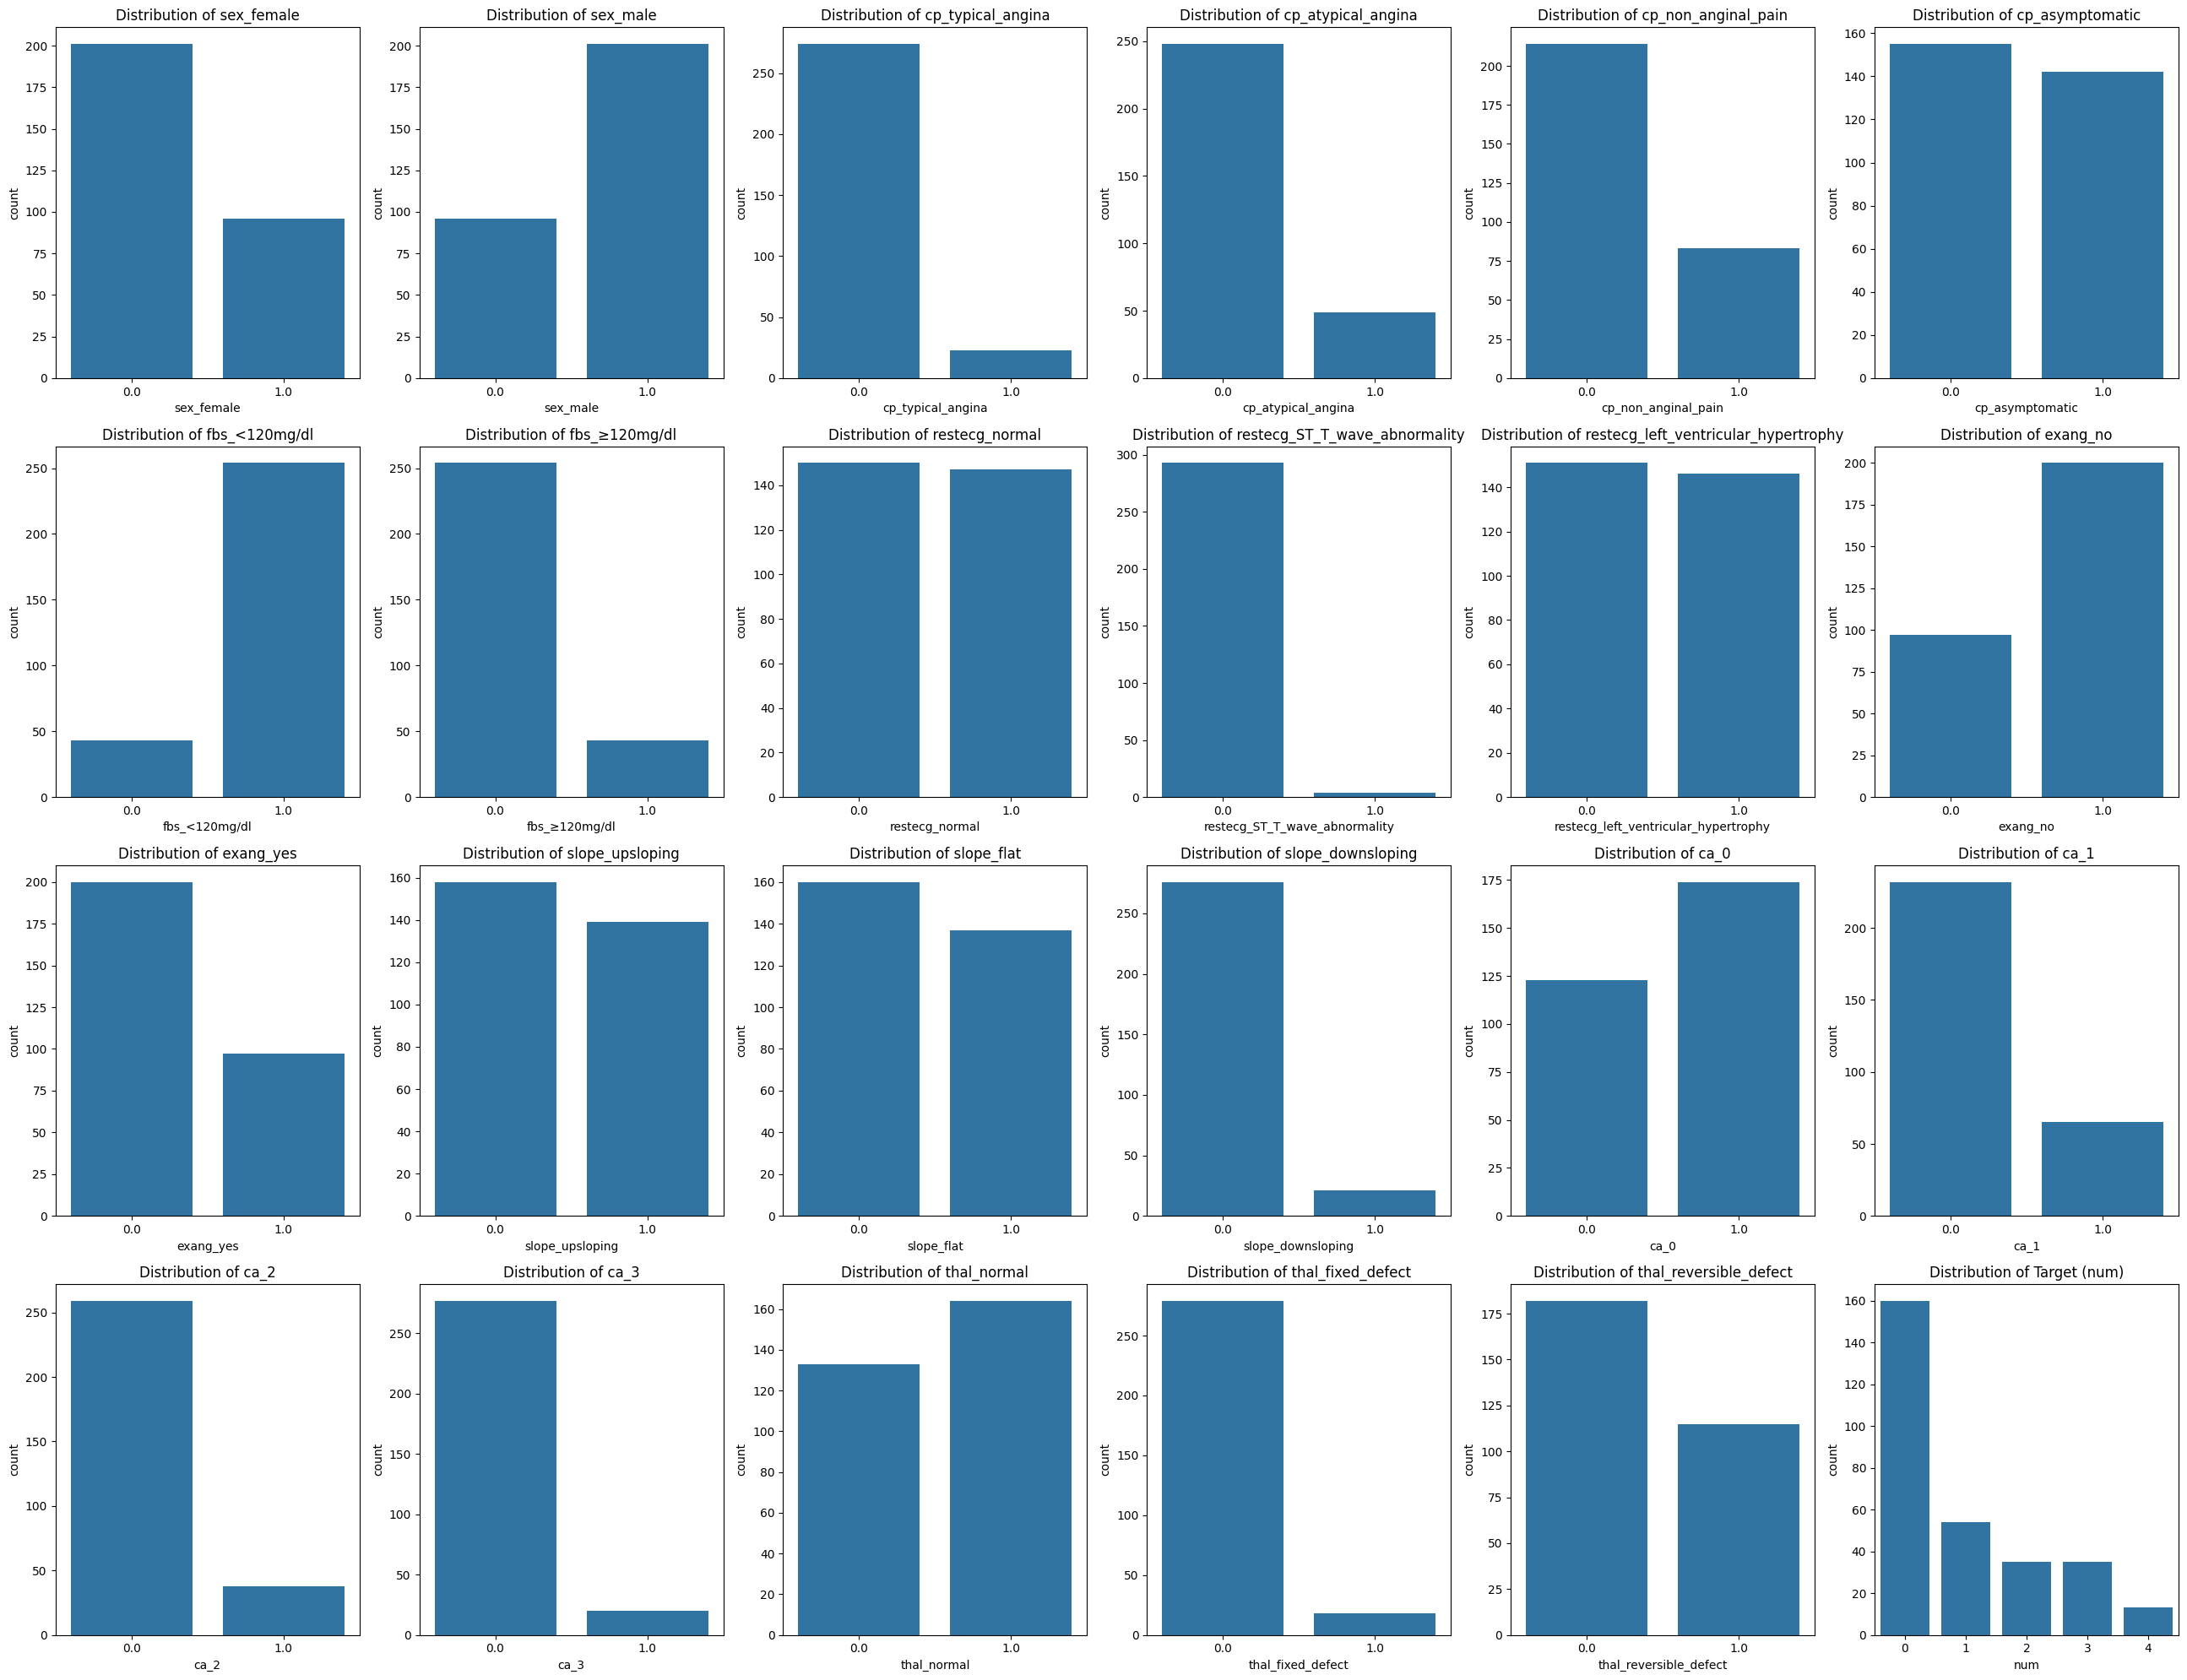

In [18]:
fig, ax = plt.subplots(4, 6, figsize=(26, 20))
for i, col in enumerate(all_encoded_cols):
  row, col_idx = i // 6, i % 6
  sns.countplot(data=df, x=col, ax=ax[row, col_idx])
  ax[row, col_idx].set_title(f"Distribution of {col}")

sns.countplot(data=df, x='num', ax=ax[3, 5])
ax[3, 5].set_title("Distribution of Target (num)")

plt.tight_layout()

Gender: Dataset is male-dominated (about 2:1), which may bias model predictions toward male patterns.

Chest Pain (cp): Most patients are asymptomatic (>140 cases), highlighting that absence of pain does not rule out heart disease.

Exercise-Induced Angina (exang): Majority report no angina during exercise (about 2:1 ratio), making positive cases particularly informative.

Resting ECG (restecg): ST-T wave abnormalities are common, suggesting many patients already show measurable cardiac stress.

Number of Major Vessels (ca): Zero affected vessels dominates; frequency decreases as vessel count increases.

Thalassemia Test (thal): Normal is most frequent, but reversible defects are notably linked with heart disease.

## Key Insights from EDA

The dataset is male-dominated (about 2:1), with most patients being asymptomatic despite having heart disease, underscoring the importance of diagnostic tests beyond symptoms.

Numerical features generally follow normal-like distributions with varying skewness; cholesterol and oldpeak show strong right skew and notable outliers.

Boxplots indicate that while no single numerical feature distinctly separates disease severity levels, variability and outlier frequency increase with higher disease categories.

Correlation analysis highlights chest pain type, thallium stress test results, number of affected vessels, gender, and age as strong predictors.